In [97]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from glob import glob
import IPython.display as ipd


import librosa
from librosa import display as dp
from scipy.io import wavfile

import argparse

In [2]:
root = 'C:/Users/LEGION/Desktop/Jupyret/datasets/recordings/'
files = os.listdir(root)

In [89]:
ind = 0
f = os.path.join(root, files[ind])
f

'C:/Users/LEGION/Desktop/Jupyret/datasets/recordings/0_george_0.wav'

In [104]:
audio=glob('C:/Users/LEGION/Desktop/Jupyret/datasets/recordings/*')
ipd.Audio(audio[1623])

In [3]:
print(f'{len(files)} FILES IN FOLDER')

3000 FILES IN FOLDER


In [34]:
def extract_spectrogram(y, sr=8000, n_fft=None) -> np.array:
    '''
    y = time series audio
    sr = sample rate (8000 by default)
    
    returns: np.array of spectrogram
    '''
    if n_fft:
        stft = librosa.stft(y, n_fft=n_fft)
    else:
        stft = librosa.stft(y)
    spectrogram = np.abs(stft)**2
    return spectrogram

def extract_melspectrogram(y, sr=8000, n_fft=2048, hop_length=512, win_length=None) -> np.array:
    '''
    y = time series audio
    sr = sample rate (8000 by default)
    TODO: define other parameters
    
    returns: np.array of melspectrogram
    '''
    melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
    return melspectrogram

def extract_mfcc(y, sr=8000, n_mfcc=20):
    '''
    y = time series audio
    sr = sample rate (8000 by default)
    n_mfcc = numner of MFCC
    
    returns: np.array of mfcc
    '''
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return mfcc
def extract_rms(y) -> np.array:
    '''
    y = time series audio
    S = spectogram magnitude
    phase = position of a sound wave in time
    
    returns: array of rms
    '''
    S, phase = librosa.magphase(librosa.stft(y))
    rms = librosa.feature.rms(S=S)
    return rms

def extract_chromagram(y, sr=8000):
    '''
    y = time series audio
    sr = sample rate (8000 by default)
    
    returns: array of chromagram
    '''
    
    chroma=librosa.feature.chroma_stft(y=y, sr=sr)
    return chroma

def extract_tempogram(y, sr=8000, hop_length=512):
    '''
    y = time series audio
    sr = sample rate (8000 by default)
    hop_length = the length of the non-intersecting portion of window length (512 by default)
    
    returns: array of chromagram
    '''
    oenv=librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
    tempogram=librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
    
    return tempogram

In [35]:
def cut_if_necessary(y=y, size=8000):
    '''
    cuts audios with duration over size
    y = time series audio
    size = duration of audio that we need (i.g. if sr=8000Hz then 1sec=8000, 0.5=4000)
    returns: np.array of y
    '''
    if y.shape[0] > size:
        y = y[:size]

    return y

def pad_if_necessary(y=y, size=8000):
    '''
    pads audios with duration less than size with zeros
    y = time series audio
    size = duration of audio that we need (i.g. if sr=8000Hz then 1sec=8000, 0.5=4000)
    returns: np.array of y
    '''
    if y.shape[0] < size:
        diff = size - y.shape[0]
        zeros = np.zeros((diff))
        y = np.concatenate([y, zeros])

    return y

In [36]:
def save_numpy(root_path, fname, arr):
    dst_path = os.path.join(root_path, fname)
    np.save(dst_path, arr)

In [37]:
dst = 'features'
dst_spec = 'spectrograms'
dst_melspecs = 'melspectrograms'
dst_mfcc = 'mfcc'
dst_rms = 'rms'
dst_chroma = 'chroma'
dst_tempogram = 'tempogram'

In [38]:
os.makedirs(dst, exist_ok=True)
os.makedirs(os.path.join(dst, dst_melspecs), exist_ok=True)
os.makedirs(os.path.join(dst, dst_mfcc), exist_ok=True)
os.makedirs(os.path.join(dst, dst_spec), exist_ok=True)
os.makedirs(os.path.join(dst, dst_rms), exist_ok=True)
os.makedirs(os.path.join(dst, dst_chroma), exist_ok=True)
os.makedirs(os.path.join(dst, dst_tempogram), exist_ok=True)

In [40]:
for f in tqdm(files):
    fpath = os.path.join(root, f)
    fname = os.path.splitext(f)[0]
    
    y, sr = librosa.load(fpath, sr=None)
    
    y = cut_if_necessary(y)
    
    spec = extract_spectrogram(y)
    melpec = extract_melspectrogram(y)
    mfcc = extract_mfcc(y)
    rms = extract_rms(y)
    chroma = extract_chromagram(y)
    tempogram = extract_tempogram(y)
    
    save_numpy(os.path.join(dst, dst_spec), fname=fname, arr=spec)
    save_numpy(os.path.join(dst, dst_melspecs), fname=fname, arr=melpec)
    save_numpy(os.path.join(dst, dst_mfcc), fname=fname, arr=mfcc)
    save_numpy(os.path.join(dst, dst_rms), fname=fname, arr=rms)
    save_numpy(os.path.join(dst, dst_chroma), fname=fname, arr=chroma)
    save_numpy(os.path.join(dst, dst_tempogram), fname=fname, arr=tempogram)

  0%|                                                                                         | 0/3000 [00:00<?, ?it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.04544067 -0.02935791 -0.01849365 ... -0.05535889 -0.03387451
 -0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
  0%|                                                                                 | 1/3000 [00:00<05:02,  9.93it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00109863  0.00054932  0.00192261 ... -0.00067139 -0.00106812
  0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00534058 -0.0155334

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01580811 -0.01309204 -0.0111084  ... -0.01086426 -0.01077271
 -0.00650024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
  1%|▌                                                                               | 23/3000 [00:01<02:46, 17.88it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.00112915 0.00161743 0.00210571 ... 0.00448608 0.00305176 0.00369263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00131226  0.00183105  0.00119019 ... -0.00732422 -0.00720215
 -0.00250244] as keyword args. From version 0.10 passing these as positional argumen

  2%|█▏                                                                              | 45/3000 [00:02<02:32, 19.40it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00561523 -0.0032959  -0.006073   ... -0.00183105 -0.00286865
 -0.00402832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 3.3569336e-04 -3.0517578e-05  5.4931641e-04 ... -4.2114258e-03
 -3.4484863e-03 -3.7231445e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
  2%|█▎                                                                              | 47/3000 [00:02<02:34, 19.14it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 2.4

  2%|█▊                                                                              | 67/3000 [00:03<02:36, 18.70it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01092529 -0.01364136 -0.01626587 ... -0.009552   -0.00796509
 -0.00946045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.009552   -0.0105896  -0.01013184 ... -0.00967407 -0.01068115
 -0.01010132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
  2%|█▊                                                                              | 69/3000 [00:03<02:36, 18.76it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.01013184  0.       

  3%|██▎                                                                             | 89/3000 [00:04<03:03, 15.87it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00964355 -0.01150513 -0.01327515 ... -0.00991821 -0.00949097
 -0.00918579] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00918579  0.01202393  0.01547241 ... -0.01290894 -0.01223755
 -0.01004028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
  3%|██▍                                                                             | 91/3000 [00:05<03:01, 16.06it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.01046753 0.0123291  

  4%|██▉                                                                            | 111/3000 [00:06<02:39, 18.15it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00076294  0.00088501  0.00033569 ...  0.00015259  0.
 -0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.00021362 0.00061035 0.00091553 ... 0.00054932 0.00073242 0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
  4%|██▉                                                                            | 113/3000 [00:06<02:42, 17.80it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00021362 -0.00018311  0.00042725 .

  4%|███▌                                                                           | 133/3000 [00:07<02:36, 18.35it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.00094604 0.00030518 0.00064087 ... 0.00045776 0.00109863 0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00030518  0.00012207 -0.00015259 ... -0.00030518 -0.00036621
 -0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
  4%|███▌                                                                           | 135/3000 [00:07<02:38, 18.04it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00115967  0.00262451 -0.00

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.0078125 -0.015625  -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
  5%|████                                                                           | 155/3000 [00:08<02:45, 17.21it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.         0.         0.        ...  0.         0.        -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0078125 -0.0078125  0.        ... -0.0078125  0.        -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result

  7%|█████▎                                                                         | 204/3000 [00:11<02:22, 19.67it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 9.1552734e-05  5.7983398e-04  4.5776367e-04 ... -2.1362305e-04
 -3.0517578e-04 -7.6293945e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.6174316e-03 -1.6174316e-03 -1.3427734e-03 ... -3.0517578e-05
  7.9345703e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
  7%|█████▍                                                                         | 206/3000 [00:11<02:25, 19.23it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWar

  8%|█████▉                                                                         | 225/3000 [00:12<02:27, 18.83it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[1.8310547e-04 4.2724609e-04 6.1035156e-05 ... 6.1035156e-05 1.5258789e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00036621 -0.00073242 -0.00054932 ...  0.00033569  0.00119019
  0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
  8%|█████▉                                                                         | 227/3000 [00:12<02:25, 19.08it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.0007019

  8%|██████▌                                                                        | 248/3000 [00:13<02:19, 19.66it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.2207031e-04 -5.4931641e-04 -4.2724609e-04 ...  9.1552734e-05
 -6.1035156e-05  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[5.1879883e-04 6.1035156e-04 5.7983398e-04 ... 6.1035156e-05 6.7138672e-04
 4.8828125e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 3.0517578e-04  3.0517578e-05  3.9672852e-04 ... -2.7465820e-04
 -3.9672852e-04 -3.9672852e-04] as keyword args

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[2.4414062e-04 1.8310547e-04 9.1552734e-05 ... 3.0517578e-05 2.7465820e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
  9%|███████▏                                                                       | 272/3000 [00:14<02:14, 20.29it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-3.9672852e-04 -2.7465820e-04 -1.8310547e-04 ...  1.2207031e-04
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00067139 -0.00054932 -0.00039673 ... -0.00082397 -0.0005188
 -0.00048828] as keyword args. From version 0.10

 10%|███████▋                                                                       | 293/3000 [00:15<01:53, 23.82it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00057983 -0.00057983 -0.00064087 ...  0.00027466  0.00024414
  0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00033569 -0.00024414 -0.00015259 ... -0.00018311 -0.00018311
 -0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.5258789e-04  3.0517578e-04  1.8310547e-04 ... -1.2207031e-04
  3.0517578e-05  2.7465820e-04] as keyword args. From version 0.10 passing th

 11%|████████▎                                                                      | 316/3000 [00:16<01:33, 28.66it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00219727 -0.0027771  -0.00280762 ...  0.00418091  0.00750732
  0.00741577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00262451  0.0027771   0.00216675 ... -0.00167847 -0.00021362
  0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00466919  0.00518799  0.00512695 ...  0.00057983 -0.00674438
 -0.00982666] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.00311279 0.00256348 0.00274658 ... 0.00619507 0.00518799 0.00354004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 11%|████████▉                                                                      | 339/3000 [00:17<01:29, 29.59it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00268555 -0.00387573 -0.00280762 ...  0.00561523  0.00543213
  0.00177002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.2512207e-03 -3.0517578e-05 -1.5563965e-03 ...  2.1362305e-03
  2.7160645e-03  2.0446777e-03] as keyword args. From version 0.10 passing these as 

 12%|█████████▌                                                                     | 364/3000 [00:18<01:31, 28.78it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00942993 -0.00915527 -0.0088501  ... -0.01409912 -0.01272583
 -0.01123047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.01150513  0.01394653  0.01675415 ... -0.00860596 -0.00787354
 -0.00930786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00921631 -0.00967407 -0.00997925 ... -0.01235962 -0.01165771
 -0.01025391] as keyword args. From version 0.10 passing these as positional 

 13%|██████████▏                                                                    | 389/3000 [00:19<01:40, 26.08it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01028442 -0.01245117 -0.01464844 ...  0.00671387  0.0078125
  0.00958252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0105896  -0.01303101 -0.01577759 ... -0.01254272 -0.01147461
 -0.01022339] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00976562  0.01019287  0.01098633 ... -0.00918579 -0.01000977
 -0.00985718] as keyword args. From version 0.10 passing these as positional a

 14%|██████████▊                                                                    | 412/3000 [00:19<01:37, 26.65it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 4.5776367e-04 -1.8310547e-04 -3.3569336e-04 ...  9.1552734e-05
 -4.2724609e-04 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[3.0517578e-05 1.8310547e-04 3.9672852e-04 ... 3.0517578e-04 3.3569336e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00039673  0.00018311  0.00015259 ... -0.00024414 -0.00021362
  0.00015259] as keyword args. From version 0.1

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00057983 -0.00027466  0.00027466 ...  0.00027466  0.00048828
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00015259 -0.00036621 -0.00036621 ... -0.00027466  0.00018311
  0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 15%|███████████▍                                                                   | 436/3000 [00:20<02:04, 20.57it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00021362 -0.00067139  0.         ...  0.00015259  0.
  0.00012207] as keyword args. From version 0.10 passing these as positional argument

D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1963
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.015625 -0.015625 -0.03125  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 15%|████████████▏                                                                  | 463/3000 [00:22<02:00, 21.00it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.        -0.015625   0.        ...  0.        -0.0078125  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0234375 -0.03125   -0.03125   ... -0.0078125 -0.0078125 -0.015625 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 16%|████████████▉                                                                  | 491/3000 [00:23<01:32, 27.18it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.        -0.0078125 -0.0078125 ... -0.0078125  0.        -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1976
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass

 17%|█████████████▍                                                                 | 512/3000 [00:24<01:20, 30.98it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1556
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 3.0517578e-04  3.0517578e-04  9.1552734e-05 ... -1.0070801e-03
 -1.0375977e-03 -8.8500977e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00097656 -0.00128174 -0.00146484 ...  0.00134277  0.00100708
  0.00097656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/9379

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.00033569 0.00039673 0.00033569 ... 0.00082397 0.00143433 0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.8310547e-04 -3.0517578e-05 -2.7465820e-04 ... -1.1596680e-03
 -9.4604492e-04 -1.0986328e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 18%|██████████████                                                                 | 536/3000 [00:24<01:18, 31.46it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1692
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.p

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -1.2207031e-04
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 19%|██████████████▋                                                                | 556/3000 [00:25<01:18, 30.96it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.         -0.00033569 -0.00015259 ...  0.00018311  0.00018311
  0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 2.7465820e-04  1.2207031e-04  6.1035156e-05 ... -6.1035156e-04
 -5.1879883e-04 -7.0190430e-04] as keyword args. From versi

 19%|███████████████▏                                                               | 579/3000 [00:26<01:22, 29.31it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=2016
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-4.8828125e-04 -4.8828125e-04 -9.1552734e-05 ... -6.1035156e-05
  3.0517578e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00039673  0.00015259  0.00027466 ... -0.00021362 -0.00042725
 -0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/9379

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00042725 -0.00085449 -0.0012207  ...  0.00292969  0.0015564
  0.00201416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00042725 -0.00131226  0.00213623 ... -0.00186157 -0.00222778
 -0.00119019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 20%|███████████████▉                                                               | 603/3000 [00:26<01:17, 30.90it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00067139 -0.00030518  0.00057983 ...  0.00338745  0.00436401
  0.00415039] as keyword args. From version 0.10 passing these as positional a

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.00033569 0.00091553 0.00061035 ... 0.00228882 0.00296021 0.00289917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00650024  0.0289917   0.04992676 ... -0.0015564  -0.00125122
 -0.00085449] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 21%|████████████████▌                                                              | 627/3000 [00:27<01:14, 31.85it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1932
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarnin

 22%|█████████████████▋                                                             | 671/3000 [00:29<01:20, 28.93it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.01077271 -0.01739502 -0.01599121 ... -0.00994873 -0.00958252
 -0.00921631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.03778076  0.01907349  0.01269531 ... -0.0093689  -0.00958252
 -0.00942993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00973511 -0.01705933 -0.02270508 ... -0.00741577 -0.00842285
 -0.00918579] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.01138306 -0.04754639  0.02374268 ...  0.00918579  0.01000977
  0.00952148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 23%|██████████████████▎                                                            | 695/3000 [00:29<01:18, 29.48it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.04418945  0.01837158 -0.02160645 ...  0.00875854  0.00970459
  0.00976562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0345459  -0.00616455  0.00308228 ... -0.00888062 -0.00961304
 -0.00918579] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-2.1362305e-04 -6.7138672e-04 -3.0517578e-04 ... -3.0517578e-05
  2.4414062e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-2.7465820e-04 -4.5776367e-04  0.0000000e+00 ...  6.1035156e-05
  1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 24%|██████████████████▉                                                            | 719/3000 [00:30<01:11, 31.88it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 4.2724609e-04  1.2207031e-04  9.1552734e-05 ... -3.3569336e-04
 -3.3569336e-04  6.7138672e-04] as keywor

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 8.5449219e-04  1.2817383e-03  4.2724609e-04 ... -6.1035156e-05
 -6.1035156e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-5.1879883e-04  0.0000000e+00 -2.4414062e-04 ...  9.1552734e-05
 -6.1035156e-05 -5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 25%|███████████████████▌                                                           | 743/3000 [00:31<01:13, 30.52it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-2.4414062e-04  2.1362305e-04 -1.2207031e-04 ... -2.4414062e-04
 -3.0517578e-05  4.5776367e-04] as keywor

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.0078125 -0.0234375  0.015625  ...  0.        -0.0078125  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 26%|████████████████████▎                                                          | 770/3000 [00:32<01:09, 32.28it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1866
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.03125    0.0234375  0.03125   ... -0.0078125 -0.015625   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 

 27%|█████████████████████                                                          | 798/3000 [00:33<01:12, 30.26it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.015625  -0.0234375 -0.03125   ... -0.015625  -0.0078125 -0.015625 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0078125  0.0078125 -0.0234375 ...  0.        -0.0078125 -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1953
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-2.7465820e-04 -1.2207031e-04 -3.0517578e-05 ...  0.0000000e+00
  4.8828125e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 3.8452148e-03  1.0620117e-02 -4.0283203e-03 ...  3.0517578e-05
  1.5258789e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00057983 -0.00091553  0.00064087 ...  0.00054932  0.00067139
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.0000000e+00  1.2207031e-04 -6.1035156e-05 ...  3.0517578e-04
  1.5258789e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 28%|██████████████████████▏                                                        | 842/3000 [00:34<01:06, 32.23it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1704
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.5258789e-04  3.0517578e-05 -3.0517578e-05 ... -1.2817383e-03
 -6.4086914e-04 -6.7138672e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
D:\Programmz\lib\site-packages\libro

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.5258789e-04  6.1035156e-05 -9.1552734e-05 ...  0.0000000e+00
  2.7465820e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 29%|██████████████████████▋                                                        | 862/3000 [00:35<01:04, 33.02it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1906
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 9.1552734e-05 -1.2207031e-04  9.1552734e-05 ... -2.7465820e-04
 -2.7465820e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/i

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00146484 -0.00219727 -0.00161743 ...  0.00152588  0.00183105
  0.00241089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.00161743 0.00460815 0.00170898 ... 0.00463867 0.00280762 0.00335693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 30%|███████████████████████▊                                                       | 906/3000 [00:36<01:04, 32.30it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00222778 -0.0010376  -0.00326538 ... -0.00265503 -0.00296021
 -0.00311279] as keyword args. From version 0.10 passing these as positional argumen

 31%|████████████████████████▍                                                      | 929/3000 [00:37<01:15, 27.54it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00646973 -0.00424194 -0.00604248 ...  0.00140381  0.00289917
  0.00357056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.04541016  0.09506226  0.06906128 ... -0.01199341 -0.01324463
 -0.01348877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.02526855  0.00619507  0.00378418 ...  0.00079346 -0.00152588
 -0.00128174] as keyword args. From version 0.10 passing these as positional 

 32%|█████████████████████████                                                      | 951/3000 [00:38<01:13, 27.70it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.8127441e-02  9.0026855e-03  6.1035156e-05 ... -5.1879883e-03
 -7.3242188e-03 -1.0070801e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.02285767  0.01052856  0.00436401 ... -0.0057373  -0.00793457
 -0.00942993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.01431274 -0.00805664 -0.00195312 ... -0.01019287 -0.01077271
 -0.01004028] as keyword args. From version 0.10 passing th

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.01202393  0.00256348 -0.00881958 ... -0.01004028 -0.0090332
 -0.00970459] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 32%|█████████████████████████▋                                                     | 975/3000 [00:39<01:20, 25.03it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.2512207e-02 -1.1077881e-02 -9.1552734e-05 ... -7.4462891e-03
 -8.6669922e-03 -9.6740723e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0145874  -0.009552   -0.00088501 ... -0.01367188 -0.01187134
 -0.009552  ] as keyword args. From version 0.10 passing the

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01290894 -0.00488281  0.00741577 ... -0.01022339 -0.01049805
 -0.00933838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01776123 -0.01538086  0.01229858 ...  0.01126099  0.01165771
  0.01052856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 33%|██████████████████████████▎                                                    | 999/3000 [00:40<01:21, 24.64it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01367188 -0.0145874   0.01922607 ... -0.00878906 -0.00976562
 -0.01000977] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-6.1035156e-05  2.4414062e-04  2.4414062e-04 ...  5.4931641e-04
  2.4414062e-04  4.8828125e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 34%|██████████████████████████▌                                                   | 1020/3000 [00:41<01:20, 24.48it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-3.3569336e-04 -5.4931641e-04 -7.3242188e-04 ...  2.7465820e-04
 -3.0517578e-05 -5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00021362 -0.00030518 -0.0007019  ...  0.00018311  0.00039673
  0.00033569] as keyword args. From versi

 35%|███████████████████████████                                                   | 1041/3000 [00:41<01:14, 26.28it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-3.0517578e-05  2.7465820e-04  3.0517578e-05 ... -1.8310547e-04
 -6.1035156e-05 -5.1879883e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00140381  0.00033569  0.00012207 ... -0.00015259 -0.00057983
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.2207031e-04  1.8310547e-04  9.1552734e-05 ... -4.8828125e-04
 -4.2724609e-04 -6.1035156e-05] as keyword args. From versi

 36%|███████████████████████████▋                                                  | 1065/3000 [00:42<01:12, 26.55it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1650
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.         0.         0.        ...  0.        -0.015625  -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1960
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.015625  -0.0078125 -0.015625 ] as keyword args. From version 0.10 passing these as positional arguments will result

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.        -0.0078125  0.        ... -0.015625  -0.0078125 -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 36%|████████████████████████████▎                                                 | 1089/3000 [00:43<01:13, 26.17it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0078125  0.         0.        ... -0.015625  -0.0078125 -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.         0.        -0.015625  ... -0.0078125 -0.015625  -0.015625 ] as keyword args. From version 0.10 passing these as positional arguments will result

 37%|████████████████████████████▉                                                 | 1111/3000 [00:44<01:08, 27.76it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1817
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00042725  0.00012207 -0.00030518 ...  0.00042725  0.00140381
  0.00079346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00033569  0.00097656  0.0007019  ...  0.00048828 -0.00061035
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: Futur

 38%|█████████████████████████████▍                                                | 1133/3000 [00:45<01:05, 28.57it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00109863  0.00076294 -0.0007019  ... -0.00073242 -0.00073242
 -0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1795
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00033569 -0.00015259 -0.00015259 ...  0.00048828  0.00091553
  0.00100708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: Futur

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-9.1552734e-05  0.0000000e+00 -1.8310547e-04 ... -4.8828125e-04
 -1.2207031e-04 -3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 38%|██████████████████████████████                                                | 1154/3000 [00:45<01:04, 28.42it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-3.6621094e-04 -1.2207031e-04 -9.1552734e-05 ...  6.1035156e-05
  2.7465820e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 2.4414062e-04 -1.5258789e-04  3.0517578e-05 ... -9.1552734e-05
 -1.2207031e-04 -5.1879883e-04] as keywor

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.2207031e-04 -1.5258789e-04 -2.1362305e-04 ...  0.0000000e+00
 -9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 39%|██████████████████████████████▌                                               | 1175/3000 [00:46<01:06, 27.63it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1697
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[9.1552734e-05 1.2207031e-04 1.8310547e-04 ... 4.2724609e-04 2.1362305e-04
 3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykern

 40%|███████████████████████████████                                               | 1196/3000 [00:47<01:07, 26.77it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.2207031e-04 -1.2207031e-04 -9.1552734e-05 ... -1.2207031e-04
  2.7465820e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1919
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 9.1552734e-05  2.1362305e-04 -2.4414062e-04 ... -3.6621094e-04
 -4.5776367e-04 -7.6293945e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/i

 41%|███████████████████████████████▋                                              | 1220/3000 [00:48<01:04, 27.45it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00140381 -0.00048828 -0.00054932 ...  0.00360107  0.00427246
  0.0039978 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00402832  0.00222778 -0.00326538 ... -0.00454712 -0.0020752
 -0.00216675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.01068115  0.00125122  0.00646973 ... -0.00292969 -0.00247192
 -0.00335693] as keyword args. From version 0.10 passing these as positional a

 41%|████████████████████████████████▎                                             | 1244/3000 [00:49<01:23, 20.93it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00604248  0.00106812  0.00534058 ... -0.00302124 -0.00067139
  0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01190186 -0.00610352  0.00408936 ...  0.00180054  0.00408936
  0.00747681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00042725  0.0022583   0.00238037 ... -0.00192261 -0.00158691
 -0.00030518] as keyword args. From version 0.10 passing these as positional 

 42%|████████████████████████████████▉                                             | 1268/3000 [00:50<01:19, 21.74it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.01272583 0.01763916 0.01654053 ... 0.01016235 0.01004028 0.00991821] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01968384 -0.01870728 -0.01055908 ...  0.01309204  0.01245117
  0.01116943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0317688  -0.02914429  0.00393677 ...  0.01086426  0.01013184
  0.00930786] as keyword args. From version 0.10 passing these as positional argumen

 43%|█████████████████████████████████▌                                            | 1292/3000 [00:51<01:10, 24.40it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00924683  0.00595093 -0.00131226 ... -0.00814819 -0.01049805
 -0.01049805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00933838  0.0085144   0.00405884 ... -0.00497437 -0.0088501
 -0.01034546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.01098633 0.01086426 0.01171875 ... 0.01043701 0.01046753 0.00915527] as keyword args. From version 0.10 passing these as positional argument

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-3.6621094e-04  7.6293945e-04  1.8310547e-04 ...  3.0517578e-05
  4.8828125e-04  5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 44%|██████████████████████████████████▏                                           | 1316/3000 [00:52<01:09, 24.35it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00079346 -0.00030518 -0.00012207 ... -0.00076294 -0.00042725
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 2.7465820e-04  1.1596680e-03 -8.8500977e-04 ... -3.0517578e-05
 -4.2724609e-04 -2.1362305e-04] as keyword args. From versi

 45%|██████████████████████████████████▊                                           | 1337/3000 [00:53<01:14, 22.44it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 6.1035156e-05 -1.5258789e-04  3.0517578e-05 ... -2.1362305e-04
 -3.0517578e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 7.6293945e-04  4.5776367e-04  4.8828125e-04 ...  1.8310547e-04
  3.0517578e-05 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00018311 -0.00030518 -0.0007019  ... -0.0005188  -0.00039673
 -0.00027466] as keyword args. From versi

 45%|███████████████████████████████████▍                                          | 1364/3000 [00:54<01:04, 25.50it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.015625  -0.0234375 -0.0234375 ...  0.        -0.0078125 -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 46%|███████████████████████████████████▌                                          | 1367/3000 [00:54<01:03, 25.76it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0390625 -0.046875  -0.046875  ... -0.0078125 -0.0078125 -0.0078125] as keyword ar

 47%|█████████████████████████████████████                                         | 1424/3000 [00:56<01:03, 24.92it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=2045
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[6.7138672e-04 9.4604492e-04 2.1362305e-04 ... 5.7983398e-04 9.1552734e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 2.1362305e-04 -2.4414062e-04 -3.0517578e-05 ...  7.6293945e-04
  4.2724609e-04  4.5776367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykern

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00015259  0.00061035  0.00097656 ... -0.00024414 -0.00100708
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 6.4086914e-04 -6.1035156e-05 -1.8310547e-04 ... -4.8828125e-04
  5.4931641e-04  7.3242188e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 48%|█████████████████████████████████████▋                                        | 1448/3000 [00:57<01:01, 25.38it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.0005188   0.00100708  0.00021362 ...  0.         -0.00073242
  0.00030518] as keyword args. From version 0.10 passing th

 49%|██████████████████████████████████████▏                                       | 1469/3000 [00:58<00:55, 27.74it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-4.5776367e-04 -6.1035156e-05  1.2207031e-04 ...  3.3569336e-04
  3.9672852e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 9.1552734e-05 -2.4414062e-04  1.5258789e-04 ... -9.1552734e-05
  6.1035156e-05 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.8310547e-04  2.4414062e-04  2.1362305e-04 ... -3.0517578e-05
 -9.1552734e-05 -6.1035156e-05] as keywor

 50%|██████████████████████████████████████▊                                       | 1493/3000 [00:59<00:54, 27.54it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-2.1362305e-04 -9.1552734e-05  1.2207031e-04 ...  1.2207031e-04
 -1.8310547e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 2.1362305e-04  3.0517578e-05 -6.1035156e-05 ...  1.2207031e-04
  0.0000000e+00  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.5258789e-04 -5.1879883e-04  2.1362305e-04 ... -2.4414062e-04
  1.5258789e-04 -9.1552734e-05] as keywor

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-7.7819824e-03 -8.8500977e-04  2.8381348e-03 ... -9.1552734e-05
 -2.1057129e-03  1.4343262e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 51%|███████████████████████████████████████▍                                      | 1517/3000 [01:00<00:59, 25.05it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00085449 -0.00341797 -0.00033569 ...  0.00177002  0.00411987
  0.0055542 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00140381 -0.0032959   0.00259399 ...  0.00521851  0.00341797
  0.00247192] as keyword args. From version 0.10 passing th

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00311279  0.00418091  0.0007019  ...  0.00598145  0.00628662
  0.00244141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00039673 -0.00402832 -0.00430298 ... -0.00363159 -0.00256348
 -0.0007019 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 51%|████████████████████████████████████████                                      | 1541/3000 [01:01<01:03, 23.11it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00167847  0.00491333 -0.00109863 ...  0.00213623  0.00402832
  0.00540161] as keyword args. From version 0.10 passing these as positional 

 52%|████████████████████████████████████████▌                                     | 1562/3000 [01:02<00:56, 25.32it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.01141357  0.01046753  0.01010132 ... -0.00012207 -0.00314331
 -0.01052856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00939941 -0.00765991 -0.00741577 ... -0.00796509 -0.00888062
 -0.00927734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01315308 -0.02783203 -0.01889038 ...  0.00991821  0.01040649
  0.00976562] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00939941  0.01321411  0.01303101 ... -0.00836182 -0.00924683
 -0.00946045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 53%|█████████████████████████████████████████▏                                    | 1586/3000 [01:03<00:57, 24.59it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01013184 -0.00735474 -0.00952148 ...  0.00741577  0.00747681
  0.00927734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01025391 -0.009552   -0.01376343 ...  0.00750732  0.01095581
  0.01174927] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-2.7465820e-04  3.0517578e-05 -2.4414062e-04 ...  3.9672852e-04
  4.2724609e-04  5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0020752  -0.0015564  -0.00177002 ...  0.00015259  0.
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 54%|█████████████████████████████████████████▊                                    | 1610/3000 [01:04<01:01, 22.76it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-7.9345703e-04  7.3242188e-04 -4.2724609e-04 ...  2.7465820e-04
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00048828 -0.00030518  0.00018311 ...  0.         -0.00018311
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 54%|██████████████████████████████████████████▍                                   | 1631/3000 [01:05<00:58, 23.40it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 3.0517578e-05 -1.8310547e-04  2.1362305e-04 ...  4.8828125e-04
 -7.6293945e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 6.1035156e-05  4.8828125e-04  5.1879883e-04 ... -4.5776367e-04
 -6.1035156e-04 -4.2724609e-04] as keyword args. From versi

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.015625  -0.015625  -0.0234375 ... -0.015625  -0.0078125 -0.0234375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 55%|███████████████████████████████████████████                                   | 1655/3000 [01:06<00:54, 24.60it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0078125  0.         0.        ... -0.0078125 -0.0078125 -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.        -0.015625  -0.0234375 ... -0.015625  -0.0078125 -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00030518 -0.00131226 -0.0017395  ... -0.00119019 -0.00024414
  0.00067139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 57%|████████████████████████████████████████████▌                                 | 1715/3000 [01:08<00:50, 25.37it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 2.0141602e-03  5.1879883e-04 -2.4414062e-04 ... -6.1035156e-05
  1.0986328e-03  1.2512207e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.5258789e-04 -9.1552734e-04 -8.2397461e-04 ... -6.1035156e-05
  2.1362305e-04 -1.2817383e-03] as keyword args. From versi

 58%|█████████████████████████████████████████████▏                                | 1736/3000 [01:09<00:48, 26.02it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00109863  0.00219727  0.00195312 ... -0.00317383 -0.00341797
 -0.00296021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00305176  0.00112915 -0.00149536 ...  0.00030518  0.00231934
  0.00140381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.0012207  -0.00161743  0.00073242 ...  0.00073242  0.00170898
 -0.00036621] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.5258789e-04  1.8310547e-04  3.0517578e-04 ...  1.5258789e-04
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 59%|█████████████████████████████████████████████▊                                | 1760/3000 [01:10<00:48, 25.53it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-9.1552734e-05  9.1552734e-05  4.2724609e-04 ... -3.0517578e-05
 -2.1362305e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-04 -3.9672852e-04 ... -3.0517578e-04
  2.1362305e-04  3.6621094e-04] as keywor

 59%|██████████████████████████████████████████████▎                               | 1781/3000 [01:11<00:49, 24.40it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05  0.0000000e+00 ... -1.8310547e-04
 -9.1552734e-05 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-3.0517578e-05 -1.8310547e-04 -2.1362305e-04 ... -1.5258789e-04
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 4.8828125e-04  9.1552734e-05 -2.4414062e-04 ...  3.0517578e-04
  3.0517578e-04  6.1035156e-05] as keywor

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00042725 -0.00183105  0.00177002 ...  0.00076294 -0.0032959
  0.00466919] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0067749   0.00552368 -0.00354004 ... -0.00054932  0.00326538
  0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 60%|██████████████████████████████████████████████▉                               | 1805/3000 [01:12<00:48, 24.58it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00942993  0.00061035  0.00643921 ... -0.00656128 -0.00210571
 -0.00411987] as keyword args. From version 0.10 passing these as positional a

 61%|███████████████████████████████████████████████▍                              | 1826/3000 [01:13<00:47, 24.80it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00439453  0.00637817 -0.00521851 ...  0.00216675 -0.00192261
 -0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-8.3526611e-02  1.6857910e-01  2.0874023e-02 ... -2.9602051e-03
 -1.3732910e-03 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.02584839  0.0300293   0.00125122 ... -0.003479   -0.00219727
 -0.00146484] as keyword args. From version 0.10 passing th

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00073242 -0.00302124  0.00244141 ...  0.00366211  0.00366211
 -0.003479  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 62%|████████████████████████████████████████████████                              | 1850/3000 [01:14<00:46, 24.53it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00735474 -0.01104736  0.01040649 ... -0.00158691 -0.00234985
 -0.00521851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00579834 -0.00384521  0.00531006 ... -0.00479126 -0.00402832
 -0.0050354 ] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00488281 -0.00531006  0.003479   ... -0.00317383 -0.00338745
 -0.00460815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 62%|████████████████████████████████████████████████▋                             | 1874/3000 [01:15<00:50, 22.19it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00610352 -0.00436401  0.00198364 ... -0.00085449 -0.00183105
 -0.00466919] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00500488 -0.00140381 -0.00091553 ...  0.00500488 -0.00289917
  0.00479126] as keyword args. From version 0.10 passing these as positional 

 63%|█████████████████████████████████████████████████▎                            | 1898/3000 [01:16<00:46, 23.76it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-5.8898926e-03  1.6174316e-03 -2.0751953e-03 ... -1.5563965e-03
  9.1552734e-05  4.7302246e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00515747 -0.00106812  0.00146484 ...  0.00192261  0.00424194
  0.00540161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.5258789e-04  2.1362305e-04 -9.1552734e-05 ...  1.8310547e-04
 -1.8310547e-04 -3.0517578e-05] as keyword args. From versi

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-3.0517578e-05 -3.9672852e-04  6.1035156e-05 ... -3.0517578e-05
  1.2207031e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 64%|█████████████████████████████████████████████████▉                            | 1922/3000 [01:17<00:44, 24.48it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00082397 -0.00039673 -0.0007019  ... -0.00018311 -0.00021362
  0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-4.2724609e-04 -1.5258789e-04  3.0517578e-04 ...  3.0517578e-05
 -4.2724609e-04 -3.0517578e-04] as keyword args. From versi

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0078125  0.         0.        ... -0.015625  -0.0078125 -0.015625 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 66%|███████████████████████████████████████████████████▏                          | 1970/3000 [01:19<00:46, 22.31it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1911
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.        -0.015625  -0.0078125 ... -0.0078125 -0.0078125 -0.015625 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 

 67%|███████████████████████████████████████████████████▉                          | 1997/3000 [01:20<00:35, 27.89it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1149
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.03125   -0.0078125  0.0234375 ... -0.21875   -0.1484375 -0.2421875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1610
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.1796875 -0.1171875 -0.171875  ...  0.         0.        -0.015625 ] as keyword args. From version 0.10 passing these as positional arguments will result

 67%|████████████████████████████████████████████████████▍                         | 2019/3000 [01:21<00:37, 26.49it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 2.4414062e-04  7.0190430e-04 -1.0681152e-03 ...  1.0681152e-03
  3.3569336e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-9.1552734e-05 -3.8146973e-03  2.5939941e-03 ...  5.1879883e-04
  1.0681152e-03 -3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.0012207  0.00115967 0.0005188  ... 0.00067139 0.0005188  0.00061035] as keyword args. From version 0.10

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 9.4604492e-04 -6.7138672e-04  3.0517578e-05 ... -6.1035156e-04
  1.9226074e-03 -1.0070801e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-6.7138672e-04  6.7138672e-04  4.8828125e-04 ... -9.1552734e-05
  3.0517578e-05 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 68%|█████████████████████████████████████████████████████                         | 2043/3000 [01:22<00:39, 24.11it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.2207031e-04  6.1035156e-05 -8.2397461e-04 ...  4.2724609e-04
  4.8828125e-04 -5.1879883e-04] as keywor

D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1763
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-3.6621094e-04 -4.5776367e-04 -2.1362305e-04 ... -9.1552734e-05
 -2.7465820e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.2207031e-04  1.5258789e-04 -3.0517578e-05 ... -2.7465820e-04
  1.2207031e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 69%|██████████████████████████████████████████████████████                        | 2079/3000 [01:23<00:35, 25.69it/s]C:\Users\LEGION\AppData\Local\Temp/i

 70%|██████████████████████████████████████████████████████▌                       | 2097/3000 [01:24<00:32, 27.66it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05  9.1552734e-05 ... -9.1552734e-05
  3.0517578e-05 -1.2817383e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.2207031e-04 -2.7465820e-04 -6.1035156e-05 ... -9.1552734e-05
  3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-5.1879883e-04  2.7465820e-04 -3.3569336e-04 ...  3.9672852e-04
 -6.1035156e-05 -1.5258789e-04] as keywor

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00085449  0.00109863  0.00079346 ... -0.00192261 -0.00073242
  0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 71%|███████████████████████████████████████████████████████▏                      | 2121/3000 [01:25<00:36, 24.32it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00527954 -0.00076294 -0.00918579 ... -0.0133667  -0.01489258
 -0.01885986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00201416 -0.00045776  0.00164795 ...  0.00891113  0.01071167
  0.01116943] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00534058 -0.0062561   0.0045166  ... -0.00372314 -0.00317383
 -0.00152588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 72%|███████████████████████████████████████████████████████▊                      | 2145/3000 [01:26<00:32, 25.97it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00073242 -0.00125122  0.00064087 ...  0.003479    0.00527954
  0.006073  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00054932 -0.00427246  0.00427246 ... -0.00210571  0.00048828
  0.00259399] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01086426  0.00686646 -0.0039978  ...  0.00772095  0.00836182
  0.00933838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 72%|████████████████████████████████████████████████████████▍                     | 2169/3000 [01:26<00:32, 25.81it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01046753  0.00646973  0.00024414 ...  0.00872803  0.00921631
  0.00924683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00967407 -0.00854492  0.00372314 ... -0.01257324 -0.01293945
 -0.01086426] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00964355  0.00762939  0.00042725 ... -0.01104736 -0.01101685
 -0.009552  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01464844  0.01257324 -0.00720215 ... -0.00891113 -0.009552
 -0.00927734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 73%|█████████████████████████████████████████████████████████                     | 2193/3000 [01:27<00:35, 22.80it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.01153564 -0.00537109 -0.00021362 ... -0.01193237 -0.01144409
 -0.01104736] as keyword args. From version 0.10 passing these as positional ar

 74%|█████████████████████████████████████████████████████████▌                    | 2214/3000 [01:28<00:29, 26.35it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-4.8828125e-04  6.1035156e-05  1.8310547e-04 ... -7.0190430e-04
 -3.6621094e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00125122 -0.00039673 -0.0015564  ...  0.0005188  -0.00036621
 -0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-9.1552734e-05 -3.3569336e-04 -1.8005371e-03 ...  1.7089844e-03
  1.3732910e-03  4.5776367e-04] as keyword args. From versi

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 6.1035156e-05 -3.6621094e-04  4.5776367e-04 ... -1.8310547e-04
 -4.2724609e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 75%|██████████████████████████████████████████████████████████▏                   | 2238/3000 [01:29<00:29, 26.02it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00067139 -0.00039673 -0.00054932 ... -0.00152588 -0.00036621
 -0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 6.4086914e-04  9.1552734e-05  3.3569336e-04 ... -1.5258789e-04
 -1.5258789e-04 -6.1035156e-05] as keyword args. From versi

 77%|███████████████████████████████████████████████████████████▉                  | 2304/3000 [01:32<00:25, 27.04it/s]D:\Programmz\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1965
  return f(*args, **kwargs)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-6.1035156e-05  3.0517578e-04 -3.0517578e-05 ...  3.0517578e-05
  1.8310547e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-6.7138672e-04  3.0517578e-04 -2.7465820e-04 ...  1.8310547e-04
  3.0517578e-05  4.5776367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/i

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.0070801e-03 -1.0070801e-03  6.1035156e-04 ... -6.1035156e-05
 -1.2207031e-04 -2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 78%|█████████████████████████████████████████████████████████████                 | 2349/3000 [01:33<00:24, 26.10it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05 -1.0070801e-03 ...  7.3242188e-04
  2.1362305e-04  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.5258789e-04 -1.8310547e-04 -3.0517578e-04 ...  3.0517578e-05
 -1.5258789e-04 -9.1552734e-05] as keywor

 79%|█████████████████████████████████████████████████████████████▌                | 2370/3000 [01:34<00:24, 25.65it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -6.1035156e-05 ... -1.8920898e-03
 -1.5869141e-03 -1.3732910e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-2.1362305e-04  1.5258789e-04  3.0517578e-05 ...  1.5258789e-04
 -3.0517578e-05  4.8828125e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-6.1035156e-05  0.0000000e+00  1.5258789e-04 ... -9.1552734e-05
 -2.4414062e-04  6.1035156e-05] as keywor

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-6.1035156e-05  2.1362305e-04 -1.2207031e-04 ...  0.0000000e+00
  1.2207031e-04  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 80%|██████████████████████████████████████████████████████████████▏               | 2394/3000 [01:35<00:23, 25.61it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  1.5258789e-04 ... -2.1362305e-04
 -2.4414062e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 3.0517578e-04  3.0517578e-05  2.7465820e-04 ... -1.5258789e-04
 -2.1362305e-04 -2.1362305e-04] as keywor

 80%|██████████████████████████████████████████████████████████████▊               | 2415/3000 [01:36<00:22, 25.87it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0020752   0.00195312 -0.00085449 ...  0.00482178 -0.00097656
 -0.0078125 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00244141 -0.00326538 -0.00360107 ... -0.00119019 -0.00048828
 -0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00128174  0.          0.00033569 ...  0.003479   -0.0072937
 -0.00411987] as keyword args. From version 0.10 passing these as positional a

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00708008  0.00411987 -0.00170898 ...  0.00680542  0.00170898
 -0.00085449] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 81%|███████████████████████████████████████████████████████████████▍              | 2439/3000 [01:37<00:22, 25.23it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00372314 -0.00619507 -0.00210571 ... -0.00372314 -0.00570679
  0.00177002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00518799  0.00408936 -0.01095581 ... -0.00085449 -0.00527954
 -0.00497437] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01037598  0.00964355 -0.00827026 ... -0.00878906 -0.0072937
 -0.00930786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 82%|████████████████████████████████████████████████████████████████              | 2463/3000 [01:38<00:23, 23.12it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.01065063  0.01315308  0.01339722 ... -0.00308228 -0.00134277
 -0.01251221] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01412964 -0.01229858 -0.01239014 ...  0.00128174  0.00299072
 -0.0093689 ] as keyword args. From version 0.10 passing these as positional a

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01437378  0.00134277 -0.02008057 ... -0.00152588  0.00119019
  0.00469971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00552368 -0.00436401  0.00457764 ... -0.00262451  0.0032959
 -0.00531006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 83%|████████████████████████████████████████████████████████████████▋             | 2487/3000 [01:39<00:20, 24.70it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00488281 -0.01495361  0.00222778 ...  0.0017395   0.00079346
 -0.00476074] as keyword args. From version 0.10 passing these as positional a

 84%|█████████████████████████████████████████████████████████████████▏            | 2508/3000 [01:40<00:19, 25.08it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00958252  0.00750732 -0.00314331 ...  0.00549316  0.01226807
  0.00933838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-9.1552734e-05  4.5776367e-04  1.5258789e-04 ... -3.0517578e-04
  3.0517578e-05 -4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-2.4414062e-04  1.8310547e-04 -3.0517578e-05 ...  6.1035156e-05
  7.6293945e-04  4.8828125e-04] as keyword args. From versi

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05  0.0000000e+00 ... -1.2207031e-04
  1.2207031e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-4.2724609e-04 -1.2207031e-04  2.4414062e-04 ... -1.8310547e-04
 -2.7465820e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 84%|█████████████████████████████████████████████████████████████████▊            | 2532/3000 [01:41<00:21, 22.28it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-2.7465820e-04 -9.1552734e-05  0.0000000e+00 ...  2.7465820e-04
  3.3569336e-04 -6.1035156e-05] as keywor

 85%|██████████████████████████████████████████████████████████████████▍           | 2553/3000 [01:42<00:19, 23.20it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.015625  -0.0078125  0.0234375 ... -0.0078125  0.        -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.        -0.0078125 -0.015625  ... -0.0078125 -0.0078125 -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.03125   -0.046875  -0.015625  ... -0.0078125 -0.0078125 -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result

 87%|███████████████████████████████████████████████████████████████████▊          | 2607/3000 [01:44<00:15, 24.68it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 2.1362305e-04 -3.0517578e-05  1.8310547e-04 ... -8.8500977e-04
 -1.7089844e-03  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00024414 -0.00073242 -0.00021362 ...  0.00073242 -0.00042725
 -0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.2207031e-04 -6.1035156e-05 -9.1552734e-05 ...  2.1362305e-04
 -2.7465820e-04 -4.8828125e-04] as keyword args. From versi

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00100708  0.00079346  0.0012207  ... -0.00021362  0.00018311
  0.00128174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 88%|████████████████████████████████████████████████████████████████████▍         | 2631/3000 [01:45<00:15, 24.00it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00064087 -0.00073242 -0.00097656 ...  0.00015259 -0.00222778
 -0.00125122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.2207031e-03  4.2724609e-04 -6.4086914e-04 ...  3.0517578e-05
  8.2397461e-04  1.9226074e-03] as keyword args. From version 0.10 passing th

 88%|████████████████████████████████████████████████████████████████████▉         | 2652/3000 [01:46<00:14, 23.77it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-3.0517578e-05  9.1552734e-05 -3.0517578e-05 ... -3.3569336e-04
 -3.3569336e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.5258789e-04  9.1552734e-05 -6.1035156e-05 ...  1.2207031e-04
 -3.3569336e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.8310547e-04 -3.0517578e-05  0.0000000e+00 ...  3.3569336e-04
 -5.1879883e-04  3.0517578e-05] as keywor

 90%|██████████████████████████████████████████████████████████████████████        | 2694/3000 [01:47<00:12, 24.91it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 6.1035156e-05  0.0000000e+00 -6.1035156e-05 ... -1.5258789e-04
 -3.3569336e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -6.1035156e-05 ...  3.0517578e-05
  9.1552734e-05  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -5.7983398e-04
  6.1035156e-05  3.3569336e-04] as keywor

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00512695  0.0020752   0.00421143 ... -0.0005188   0.00094604
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 91%|██████████████████████████████████████████████████████████████████████▋       | 2718/3000 [01:48<00:11, 23.85it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00244141  0.00268555  0.003479   ...  0.00439453  0.00302124
 -0.00222778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.04190063  0.04425049  0.02926636 ... -0.00494385 -0.00222778
 -0.00341797] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00430298  0.00421143  0.00341797 ...  0.00305176 -0.00012207
 -0.00405884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 91%|███████████████████████████████████████████████████████████████████████▎      | 2742/3000 [01:49<00:10, 25.03it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.00354004 0.00485229 0.00378418 ... 0.00527954 0.00216675 0.00073242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00280762  0.00250244  0.00314331 ...  0.00601196  0.00088501
 -0.00170898] as keyword args. From version 0.10 passing these as positional argumen

 92%|███████████████████████████████████████████████████████████████████████▉      | 2766/3000 [01:50<00:09, 25.21it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01028442 -0.00997925 -0.01119995 ... -0.01068115 -0.01101685
 -0.00967407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00970459  0.01089478  0.01138306 ... -0.01098633 -0.0098877
 -0.00930786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.01141357 -0.01443481 -0.01708984 ... -0.00921631 -0.0085144
 -0.01004028] as keyword args. From version 0.10 passing these as positional ar

 93%|████████████████████████████████████████████████████████████████████████▌     | 2790/3000 [01:51<00:08, 25.12it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0050354  -0.00637817 -0.00759888 ...  0.00491333  0.00543213
  0.00473022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00494385  0.00524902  0.00537109 ... -0.00350952 -0.00387573
 -0.00460815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00485229 -0.00485229 -0.00466919 ... -0.00079346 -0.00396729
 -0.00500488] as keyword args. From version 0.10 passing these as positional 

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 9.7656250e-04 -1.2817383e-03  9.1552734e-05 ...  6.4086914e-04
  1.8310547e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 94%|█████████████████████████████████████████████████████████████████████████▏    | 2814/3000 [01:52<00:08, 22.72it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 6.1035156e-05  2.4414062e-04 -6.1035156e-05 ...  0.0000000e+00
  3.0517578e-05 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00048828 -0.00021362 -0.00018311 ...  0.00085449  0.00082397
  0.00082397] as keyword args. From versi

 94%|█████████████████████████████████████████████████████████████████████████▋    | 2835/3000 [01:53<00:06, 24.87it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00863647  0.00827026  0.00686646 ... -0.00036621 -0.00064087
 -0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[0.00137329 0.00149536 0.00146484 ... 0.00088501 0.00076294 0.00143433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.00054932  0.00033569  0.00015259 ...  0.00018311 -0.00067139
  0.        ] as keyword args. From version 0.10 passing these as positional argumen

 96%|██████████████████████████████████████████████████████████████████████████▌   | 2868/3000 [01:54<00:05, 23.48it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.015625  -0.0234375 -0.015625  ... -0.0078125  0.        -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.         0.0078125  0.        ... -0.015625  -0.0078125 -0.015625 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 96%|██████████████████████████████████████████████████████████████████████████▋   | 2871/3000 [01:55<00:05, 22.65it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.        -0.0078125  0.        ...

 97%|███████████████████████████████████████████████████████████████████████████▊  | 2916/3000 [01:56<00:03, 25.20it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-4.2724609e-04 -3.0517578e-05 -1.5258789e-04 ... -4.2724609e-04
  3.9672852e-04  1.4038086e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.0007019  -0.00054932 -0.0005188  ...  0.00115967 -0.00036621
 -0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00021362 -0.00045776 -0.00039673 ...  0.00036621  0.00033569
  0.00228882] as keyword args. From version 0.10 passing th

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00119019 -0.00125122 -0.0012207  ... -0.0010376  -0.00158691
 -0.00158691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-1.0681152e-03 -1.3427734e-03 -1.6479492e-03 ... -1.8310547e-04
 -9.1552734e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
 98%|████████████████████████████████████████████████████████████████████████████▍ | 2940/3000 [01:57<00:02, 25.58it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-0.00045776 -0.00054932 -0.00039673 ...  0.00094604  0.00097656
  0.00082397] as keyword args. From version 0.10 passing th

 99%|████████████████████████████████████████████████████████████████████████████▉ | 2961/3000 [01:58<00:01, 25.11it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 1.2207031e-04  3.9672852e-04  9.1552734e-05 ... -2.4414062e-04
 -1.8310547e-04 -3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  1.5258789e-04 ...  1.2207031e-04
 -3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[-6.1035156e-05  0.0000000e+00 -1.5258789e-04 ...  3.0517578e-05
 -9.1552734e-05 -6.1035156e-05] as keywor

C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05 -9.1552734e-05 ... -9.1552734e-05
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
100%|█████████████████████████████████████████████████████████████████████████████▌| 2985/3000 [01:59<00:00, 24.29it/s]C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[2.7465820e-04 1.5258789e-04 3.3569336e-04 ... 6.1035156e-05 1.2207031e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\LEGION\AppData\Local\Temp/ipykernel_7708/937953213.py:23: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ... -3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args

In [47]:
if __name__ == "__main__":
	parser = argparse.ArgumentParser(description='Prepare audio features')
	parser.add_argument("src_folder", type=str, help="[input] to a folder with raw wav files")
	parser.add_argument("dst_folder", type=str, help="[output]  to a folder to store features")
	args = parser.parse_args()

	files = os.listdir(args.src_folder)

	main(files, args.src_folder, args.dst_folder)

usage: ipykernel_launcher.py [-h] src_folder dst_folder
ipykernel_launcher.py: error: the following arguments are required: dst_folder


SystemExit: 2

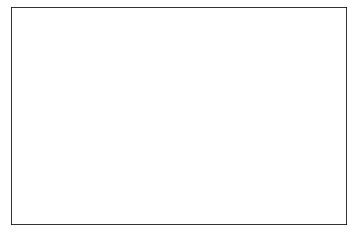

In [52]:
librosa.display.specshow(rms)

[Text(0.5, 1.0, 'log Power spectrogram')]

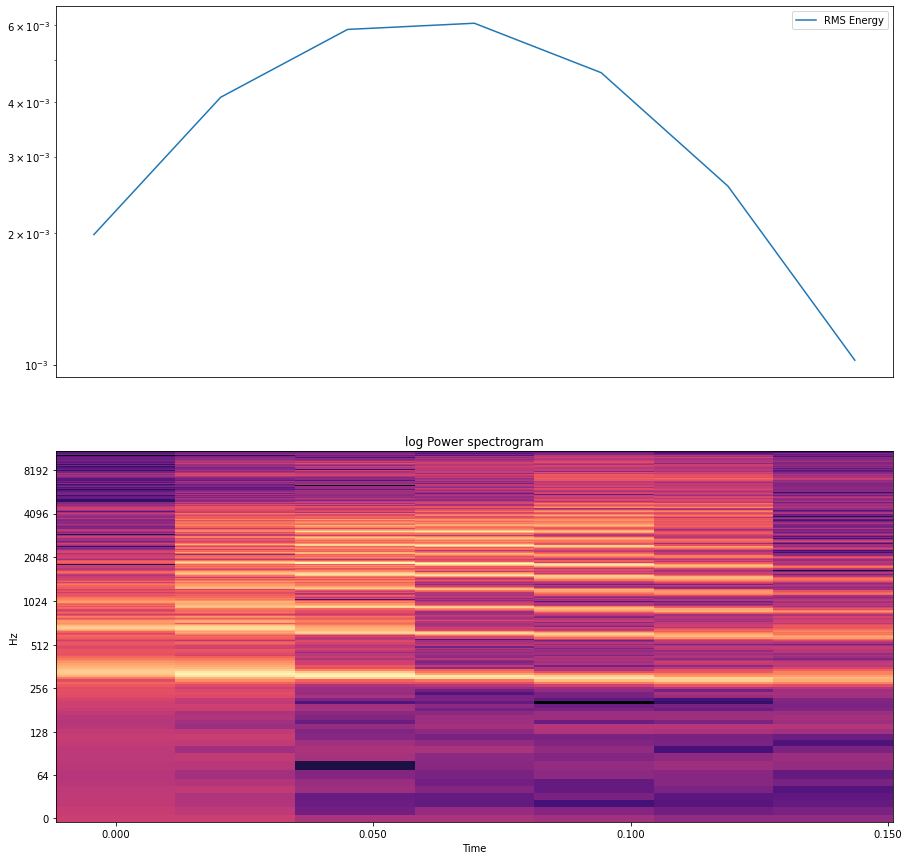

In [67]:
S, phase = librosa.magphase(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, figsize=(15,15))

times = librosa.times_like(rms)

ax[0].semilogy(times, rms[0], label='RMS Energy')

ax[0].set(xticks=[])

ax[0].legend()

ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='log Power spectrogram')

In [63]:
hop_length=512
sr=8000
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)

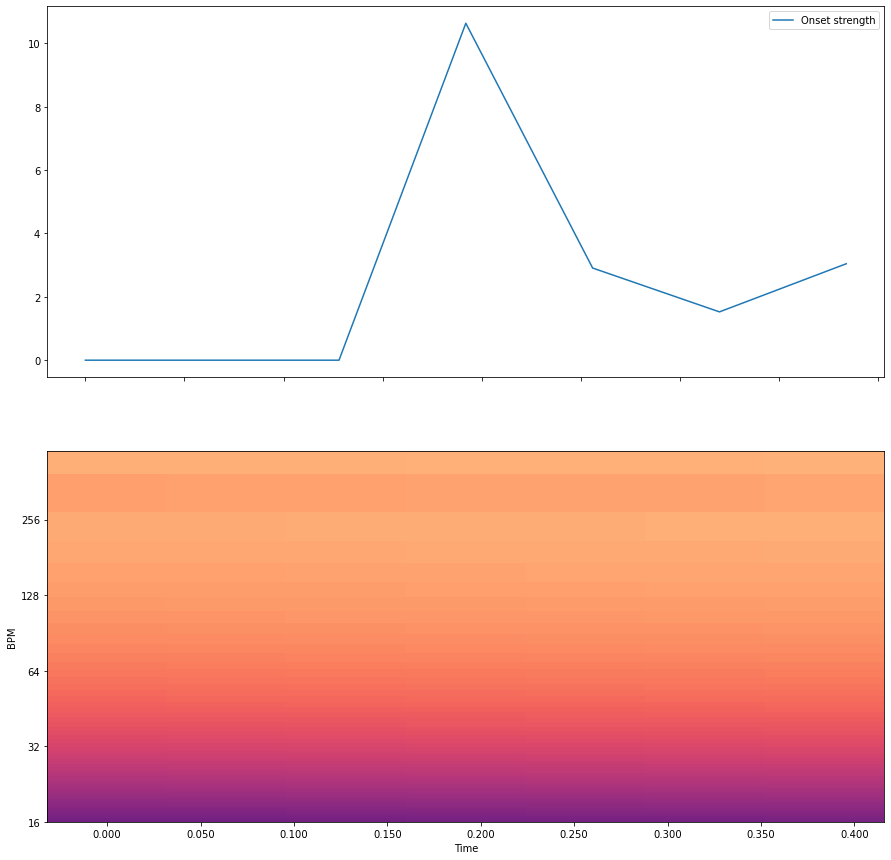

In [68]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 15))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='tempo', cmap='magma', ax=ax[1])


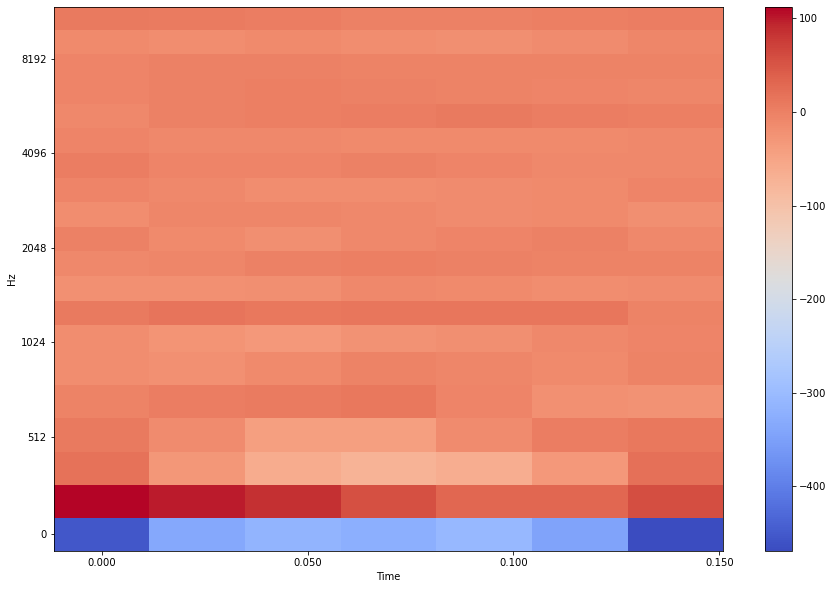

In [80]:
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(15,10))
img = librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
fig.colorbar(img)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

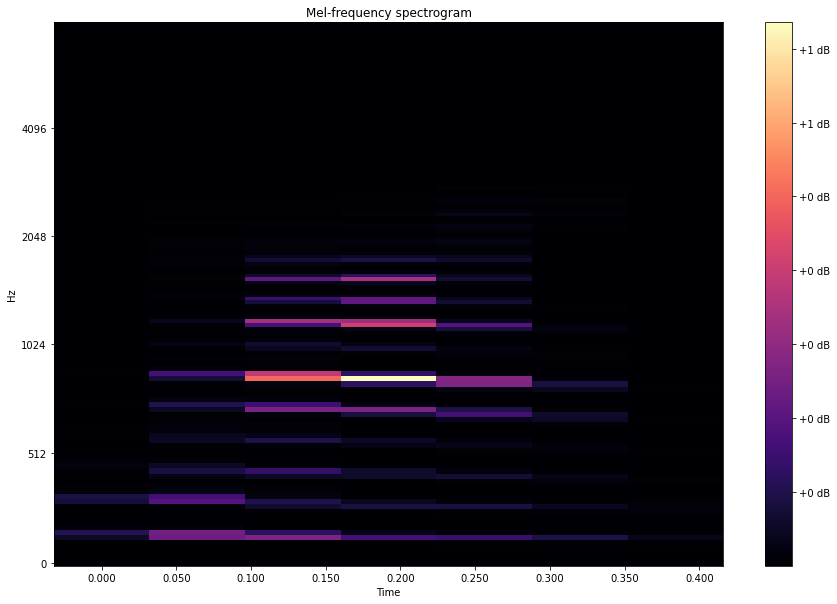

In [86]:
fig, ax = plt.subplots(figsize=(15,10))
img = librosa.display.specshow(melpec, x_axis='time',

                         y_axis='mel', sr=sr,

                         fmax=8000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')